In [1]:
%matplotlib inline
import os
import numpy as np
import hashlib
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pytesseract
import pandas as pd
import cv2

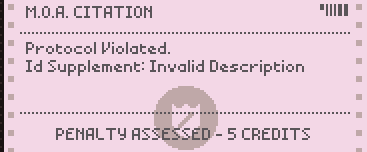

In [2]:
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        img = Image.open(os.path.join(root, 'result.png'))
        break
img

In [3]:
h = hash(str(np.array(img)))
h

7450525708482806015

In [4]:
id_to_image = {}
hash_to_image = {}
hash_to_ids = {}
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        img = Image.open(os.path.join(root, 'result.png'))
        id = os.path.basename(root)
        id_to_image[id] = img
        h = hashlib.md5(img.tobytes()).hexdigest()
        hash_to_image[h] = img
        if h not in hash_to_ids:
            hash_to_ids[h] = []
        hash_to_ids[h].append(id)

In [5]:
len(id_to_image), len(hash_to_image)

(1653, 256)

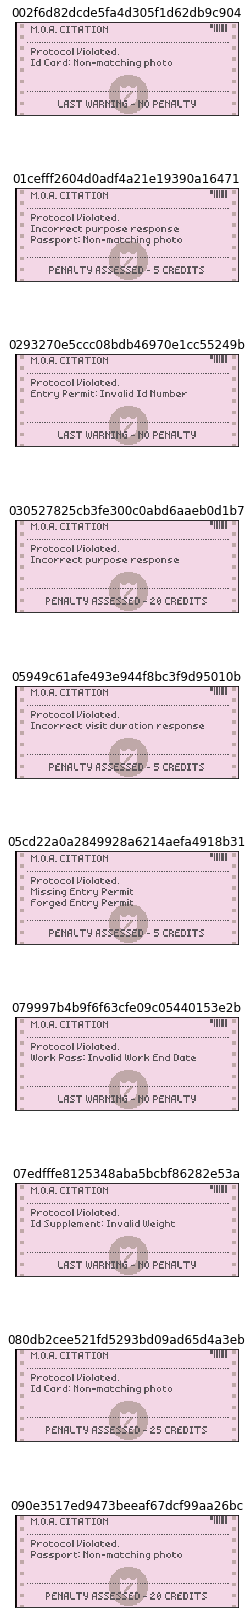

In [6]:
plt.figure(figsize=(4, 30))
display = 10
for i, k in enumerate(sorted(hash_to_image.keys())[:display]):
    plt.subplot(display, 1, i+1), plt.xticks([]), plt.yticks([]), plt.title(k), plt.imshow(hash_to_image[k]);

In [7]:
VIOLATIONS = [
    # entry permit
    'Entry Permit: Invalid Id Number',
    'Entry Permit: Invalid Expiration Date',
    'Entry Permit: Invalid Name',
    'Missing Entry Permit',
    'Forged Entry Permit',

    # passport
    'Missing Passport',
    'Passport: Invalid Gender',
    'Passport: Invalid Expiration Date',
    'Passport: Non-matching photo',
    'Passport: Invalid Issuing City',
    
    # id card
    'Missing Id Card',
    'Id Card: Invalid Birth Date',
    'Id Card: Non-matching photo',
    'Id Card: Invalid Weight',
    'Id Card: Invalid Height',
    'Id Card: Invalid Name',
    'Id Card: Invalid District',

    # id supplement
    'Missing Id Supplement',
    'Id Supplement: Invalid Expiration Date',
    'Id Supplement: Invalid Weight',
    'Id Supplement: Invalid Height',
    'Id Supplement: Invalid Thumbprint',
    'Id Supplement: Invalid Description',

    # responses
    'Incorrect purpose response',
    'Incorrect visit duration response',
    
    # Diplomatic
    'No Diplomatic Access to Arstotzka',
    'Diplomatic Auth: Invalid Name',
    'Diplomatic Auth: Invalid Id Number',
    'Forged Diplomatic Auth',

    # Work pass
    'Missing Work Pass',
    'Work Pass: Invalid Name',
    'Forged Work Pass',
    'Work Pass: Invalid Work End Date',

    # Wanted criminal
    'Wanted criminal admitted',
]

def find_violations(img):
    img = img.crop((20, 38, img.width-20, 112))
    data = ' '.join(pytesseract.image_to_data(img, output_type=pytesseract.Output.DICT)['text'])
    data = data.replace('Protocol Violate', '')
    data = data.replace('Protocol Fiolated. ', '')
    data = data.replace('Protocol Hiolated. ', '')
    data = data.replace('Protocol Hiclated', '')
    data = data.strip()
    data = data.replace('Trvalid', 'Invalid')
    data = data.replace('Humber', 'Number')
    data = data.replace('lleight', 'Weight')
    data = data.replace('llork', 'Work')
    data = data.replace('lilork', 'Work')
    data = data.replace('Hon-matching', 'Non-matching')
    data = data.replace('Inwalid eight', 'Invalid Weight')
    data = data.replace('Invalid ileight', 'Invalid Weight')
    data = data.replace('Ho Diplomatic Access', 'No Diplomatic Access')
    data = data.replace('!', ':')
    data = data.replace('Inwalid', 'Invalid')
    data = data.replace('Td Number', 'Id Number')
    data = data.replace('Invalid Lesuing City', 'Invalid Issuing City')
    data = data.replace('Td Supplement', 'Id Supplement')
    data = data.replace('Lgl humbprint', 'Invalid Thumbprint')
    data = data.replace('Invalid Jd Number', 'Invalid Id Number')
    data = data.replace('Invalid Nome', 'Invalid Name')
    data = data.replace('Invalid Hame', 'Invalid Name')
    data = data.replace('Invalid Home', 'Invalid Name')
    data = data.strip()
    violations = [v for v in VIOLATIONS if v in data]
    for v in violations:
        data = data.replace(v, '')
    data = data.strip()
    for suffix in ('a,', ':', '.', ','):
        if data.endswith(suffix):
            data = data[:-len(suffix)].strip()
    data = data.strip()
    data = data.replace('  ', ' ')
    data = data.replace('Possible Smuqgler Admitted', '')
    data = data.replace('Possible Smuggler, Admitted', '')
    if len(data) > 0:
        raise Exception('exceeding text: "{}"'.format(data))
    return violations

[h for h, img in hash_to_image.items() if len(find_violations(img)) == 0]

['d42f4a99a5dd5935b8c0c76343cfbe82',
 '48228f936d9178c73b6bb4d29b128f69',
 'fc31124f8e4916df1bbce00a053c2b56',
 '9c2f24b175fd7ce621a47439b7cb3a72',
 'ce1960b1dc744d3115cedc8648b8fbfe',
 '255b685b36093da0c4bac834f6206bb2',
 '2d8adf718e282b52666300b5f0cf4f98']

In [8]:
images = [(h, img) for h, img in hash_to_image.items() if len(find_violations(img)) == 0]

In [9]:
hash_count = {}
for img in id_to_image.values():
    h = hashlib.md5(img.tobytes()).hexdigest()
    hash_count[h] = hash_count.get(h, 0) + 1

In [10]:
hash_count

{'002f6d82dcde5fa4d305f1d62db9c904': 2,
 '01cefff2604d0adf4a21e19390a16471': 1,
 '0293270e5ccc08bdb46970e1cc55249b': 6,
 '030527825cb3fe300c0abd6aaeb0d1b7': 1,
 '05949c61afe493e944f8bc3f9d95010b': 5,
 '05cd22a0a2849928a6214aefa4918b31': 1,
 '079997b4b9f6f63cfe09c05440153e2b': 1,
 '07edfffe8125348aba5bcbf86282e53a': 3,
 '080db2cee521fd5293bd09ad65d4a3eb': 1,
 '090e3517ed9473beeaf67dcf99aa26bc': 2,
 '0964269c7bb7c81e16b05528f8c54745': 22,
 '0dfb8222811b25ed806a7a8cfbf82ae2': 1,
 '0e2cc32110c09f959690b35d84cc2f13': 1,
 '0e6320478f91b7f6ab5dc1175b3ac77b': 1,
 '0f341f9334422a188e122d1494901da9': 2,
 '11b63853951ffaf6fcba13f6c3262552': 3,
 '1318fee878801dc10f37ab5e28d48d99': 1,
 '1355cff4ae9b9357c960588b47843f78': 2,
 '148aeb7aed19cec96d6be0ef35811d5f': 1,
 '16d562e9357e25433bd5b2fa5395ed25': 9,
 '18455a8bfadcc3707eaa3927d92d1d96': 2,
 '1871b6b542262106283e9c8c42555ac2': 1,
 '1b06ce851f19136e3cade9c72e420a93': 1,
 '1c4a82fd09648553061010850c363b99': 10,
 '1c581d3d09e43495030748e8462cabb6': 1

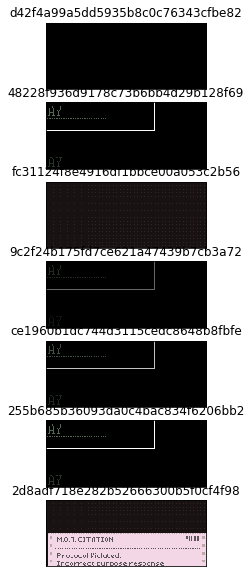

In [11]:
hashes = ['d42f4a99a5dd5935b8c0c76343cfbe82',
 'ce1960b1dc744d3115cedc8648b8fbfe',
 '2d8adf718e282b52666300b5f0cf4f98',
 '9c2f24b175fd7ce621a47439b7cb3a72',
 'fc31124f8e4916df1bbce00a053c2b56',
 '48228f936d9178c73b6bb4d29b128f69',
 '255b685b36093da0c4bac834f6206bb2']
plt.figure(figsize=(10, 10))
for i, (h, img) in enumerate(images):
    plt.subplot(len(images), 1, 1+i), plt.title(h), plt.xticks([]), plt.yticks([]), plt.imshow(img)

In [12]:
for r in (
    'd42f4a99a5dd5935b8c0c76343cfbe82',
    'ce1960b1dc744d3115cedc8648b8fbfe',
    '2d8adf718e282b52666300b5f0cf4f98',
    '9c2f24b175fd7ce621a47439b7cb3a72',
    '48228f936d9178c73b6bb4d29b128f69',
    '255b685b36093da0c4bac834f6206bb2'
):
    if r in hash_to_ids:
        for id in hash_to_ids[r]:
            del id_to_image[id]
    if r in hash_to_image:
        del hash_to_image[r]
    if r in hash_to_ids:
        del hash_to_ids[r]

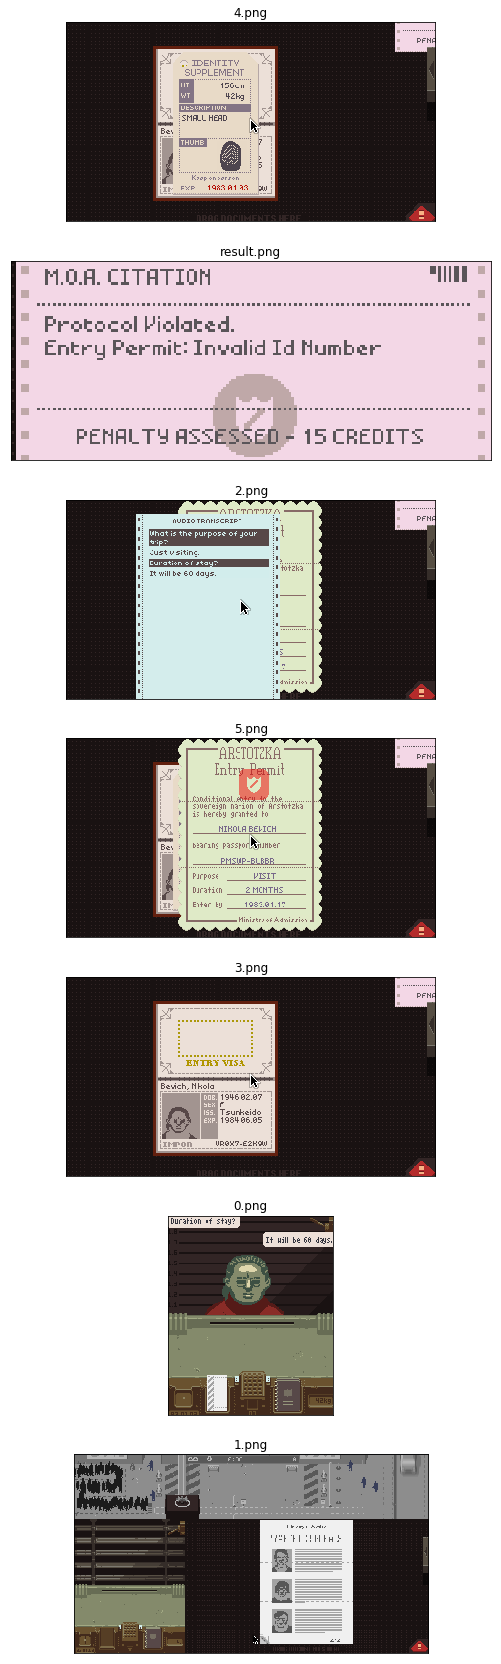

In [13]:
d = 'data/d1cf7290-48b5-4aff-8581-c72672fcb0d9'
plt.figure(figsize=(10, 30))
for root, dirs, files in os.walk(d):
    for i, f in enumerate(files):
        plt.subplot(len(files), 1, 1+i), plt.title(f), plt.xticks([]), plt.yticks([]), plt.imshow(Image.open(os.path.join(d, f)))

In [14]:
hash_to_violations = {}
for h, img in hash_to_image.items():
    hash_to_violations[h] = find_violations(img)

In [15]:
violation_counts = {}
no_violation_count = 0
for hash, ids in hash_to_ids.items():
    violations = hash_to_violations[hash]
    if len(violations) == 0:
        no_violation_count += len(ids)
    for violation in violations:
        violation_counts[violation] = violation_counts.get(violation, 0) + len(ids)

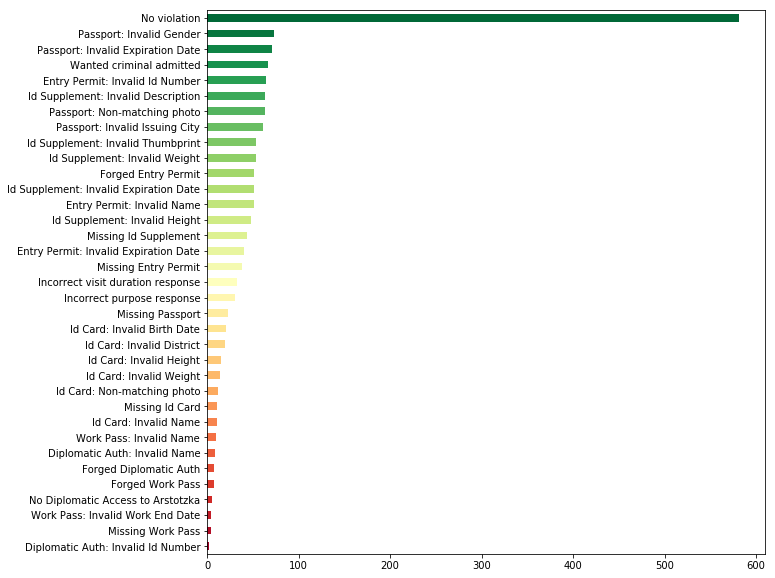

In [16]:
violation_counts['No violation'] = no_violation_count
plt.figure(figsize=(10, 10))
pd.Series(violation_counts).sort_values().plot(kind='barh', color=cm.RdYlGn(np.linspace(0,1,len(violation_counts))));

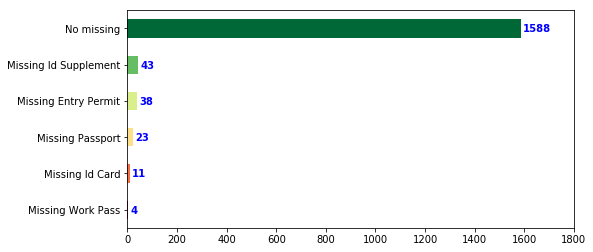

In [17]:
plt.figure(figsize=(8, 4))
missings = {'No missing': 0}
for k, v in violation_counts.items():
    if 'Missing' in k:
        missings[k] = v
    else:
        missings['No missing'] += v
s = pd.Series(missings).sort_values()
s.plot(kind='barh', color=cm.RdYlGn(np.linspace(0,1,len(missings))));
plt.xticks(np.arange(0, missings['No missing'] + 300, 200))
for i, v in enumerate(s):
    plt.text(v + 8, i - .1, str(v), color='blue', fontweight='bold')

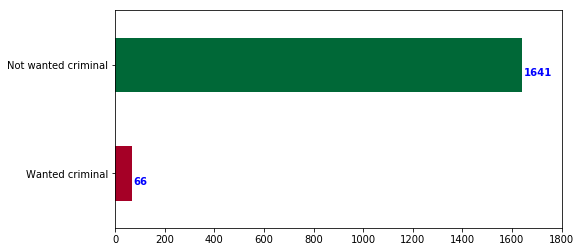

In [20]:
plt.figure(figsize=(8, 4))
wanted_criminal, not_wanted_criminal = 0, 0
for k, v in violation_counts.items():
    if k == 'Wanted criminal admitted':
        wanted_criminal += v
    else:
        not_wanted_criminal += v
s = pd.Series({'Not wanted criminal': not_wanted_criminal, 'Wanted criminal': wanted_criminal}).sort_values()
s.plot(kind='barh', color=cm.RdYlGn(np.linspace(0,1,2)));
plt.xticks(np.arange(0, max(not_wanted_criminal, wanted_criminal) + 300, 200))
for i, v in enumerate(s):
    plt.text(v + 8, i - .1, str(v), color='blue', fontweight='bold')

In [59]:
maxh, maxw = 0, 0
for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        files = sorted(f for f in files if f != 'result.png' and f != 'input.png' and f != 'output.csv')
        w, h = 0, 0
        for f in files:
            img = Image.open(os.path.join(root, f))
            h = max(h, img.size[1])
            w = w + img.size[0]
        maxh = max(h, maxh)
        maxw = max(w, maxw)

for root, dirs, files in os.walk('data'):
    if 'result.png' in files:
        if 'output.csv' in files and 'input.png' in files: continue
        files = sorted(f for f in files if f != 'result.png' and f != 'input.png' and f != 'output.csv')

        inputf = np.zeros((maxh, maxw, 3))
        x = 0
        for f in files:
            img = np.array(Image.open(os.path.join(root, f)))
            inputf[0:img.shape[0], x:img.shape[1]+x, :] = img
            x += img.shape[1]
        cv2.imwrite(os.path.join(root, 'input.png'), inputf)
        id = os.path.basename(root)
        if id not in id_to_image: continue
        h = hashlib.md5(id_to_image[id].tobytes()).hexdigest()
        violations = hash_to_violations[h]
        with open(os.path.join(root, 'output.csv'), 'w') as fp:
            fp.write(','.join([str(int(v in violations)) for v in VIOLATIONS]))